In [1]:
import pandas as pd
import seaborn as sns

### Setze die Wahlergebnisse der letzten Jahre zusammen. 

Zuordnung von Wahlbezirk zum Stadtteil. In der Innenstadt passen die Schnitte evtl. nicht zu 100% in einen Stadtteil. Alles habe ich händisch zugeordnet, da es dazu kein Mapping der Stadt gibt. 

In [2]:
stadtteile_zu_wahlbezirk = {
    'Wixhausen': [860, 870, 880, 890],
    'Arheilgen': [431, 440, 450, 460, 481, 482, 483, 490, 500, 510, 521, 522, 530],
    'Kranichstein': [411, 412, 413, 421, 422, 431, 432, 440],
    'Eberstadt': [900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050],
    'DA-Nord': [120, 230, 90, 100, 130,140,150,180,190,200,210,220, 240,250, 60, 380, 370, 390,],
    'DA-Ost': [260,270,280, 290, 320,340, 350,310, 330],
    'Bessungen': [600, 610, 620, 630, 640, 650, 660, 680, 690,],
    'DA-West': [720, 730, 750, 760, 780, 790, 800, 810, 820, 830, 831, 832, 840, 850],
    'DA-Mitte': [10, 20, 30, 40, 50, 710, 580, 570, 560, 550, 540,]
}

In [3]:
# Funktion um einem bezirk einen Stadtteil zuzuordnen
def map_wahlbezirk_zu_stadtteil(bezirk):
    for k in stadtteile_zu_wahlbezirk.keys():
        if bezirk in stadtteile_zu_wahlbezirk[k]:
            return k
        
    return None

In [6]:
parteien = ['CDU', 'Grüne', 'SPD', 'AfD', 'FDP', 'Linke']

Die Zuordnung von D1/F1 bis D6/F6 habe ich jeweils der Homepage übernommen. Diese variieren zwischen den Wahlen leider

In [7]:
# D1 / F1 : Christlich Demokratische Union Deutschlands
# D2 / F2 : Sozialdemokratische Partei Deutschlands
# D3 / F3 : Alternative für Deutschland
# D4 / F4 : Freie Demokratische Partei
# D5 / F5 : BÜNDNIS 90/DIE GRÜNEN
# D6 / F6 : DIE LINKE

btw21 = pd.read_csv("btw_21.csv", sep=';').rename(columns={
    'F1': 'CDU',
    'F2': 'SPD',
    'F3': 'AfD',
    'F4': 'FDP',
    'F5': 'Grüne',
    'F6': 'Linke',
    'B' : 'Insgesamt' # prüfen welches hier für gültige Stimmen steht
})[['wahl','gebiet-nr','gebiet-name', 'Insgesamt'] + parteien]

In [8]:
# D1 / F1 : Christlich Demokratische Union Deutschlands
# D2 / F2 : BÜNDNIS 90/DIE GRÜNEN
# D3 / F3 : Sozialdemokratische Partei Deutschlands
# D4 / F4 : Alternative für Deutschland
# D5 / F5 : Freie Demokratische Partei
# D6 / F6 : DIE LINKE
ltw23 = pd.read_csv("ltw_23.csv", sep = ';').rename(columns={
    'F1': 'CDU',
    'F2': 'Grüne',
    'F3': 'SPD',
    'F4': 'AfD',
    'F5': 'FDP',
    'F6': 'Linke',
    'B' : 'Insgesamt' # prüfen welches hier für gültige Stimmen steht
})[['wahl','gebiet-nr','gebiet-name', 'Insgesamt'] + parteien]

In [9]:
# D1 : Christlich Demokratische Union Deutschlands
# D2 : BÜNDNIS 90/DIE GRÜNEN
# D3 : Sozialdemokratische Partei Deutschlands
# D4 : Alternative für Deutschland
# D5 : Freie Demokratische Partei
# D6 : DIE LINKE
euw24 = pd.read_csv("euw_24.csv", sep = ';').rename(columns = {
    'D1': 'CDU',
    'D2': 'Grüne',
    'D3': 'SPD',
    'D4': 'AfD',
    'D5': 'FDP',
    'D6': 'Linke',
    'B' : 'Insgesamt' # prüfen welches hier für gültige Stimmen steht
})[['wahl','gebiet-nr','gebiet-name', 'Insgesamt'] + parteien]

In [12]:
btw25 = pd.read_csv("zensus_und_wahlergebnis_darmstadt.csv")[['gebiet-nr','Insgesamt','SPD','CDU','Grüne','FDP','AfD','Linke','Anteil_SPD','Anteil_CDU','Anteil_Grüne','Anteil_FDP','Anteil_AfD','Anteil_Linke']]
btw25['wahl'] = 'Bundestagswahl 2025'
btw25['gebiet-name'] = None

In [13]:
# Gebe noch kurze Namen
wahl_mapper = {
    'Wahl zum Deutschen Bundestag': 'BTW21',
    'Landtagswahl 2023': 'LTW23',
    'Europawahl': 'EU24',
    'Bundestagswahl 2025': 'BTW25',
}

Setze die einzelnen Wahlen jetzt zu einem Datensatz zusammen. Bestimme noch den Prozentsatz der Partei. 

In [14]:
df = pd.concat([btw21, ltw23, euw24, btw25])
for c in parteien:
    neu = c + '_Anteil'
    proz = c+ '_Prozent'
    df[neu] = df[c]/df['Insgesamt']
    df[proz] = df[neu] *100.0

df['Wahl_Abkürzung'] = df.wahl.apply(lambda x: wahl_mapper[x])

In [15]:
df['Stadtteil'] = df['gebiet-nr'].apply(lambda x: map_wahlbezirk_zu_stadtteil(x))

Mach den Datensatz "lang". 

In [16]:
dfl_prozent = pd.melt(df, ['Wahl_Abkürzung', 'gebiet-nr', 'Stadtteil'], ['Grüne_Prozent', 'CDU_Prozent', 'SPD_Prozent', 'FDP_Prozent', 'AfD_Prozent', 'Linke_Prozent'],
        'Partei', 'Prozent')
dfl_prozent['Partei'] = dfl_prozent.Partei.apply(lambda x: x.replace("_Prozent", ""))
dfl_stimmen = pd.melt(df, ['Wahl_Abkürzung', 'gebiet-nr', 'Stadtteil'], ['Grüne', 'CDU', 'SPD', 'FDP', 'AfD', 'Linke'],
        'Partei', 'Stimmen')
dfl = pd.merge(dfl_prozent, dfl_stimmen, on =['Wahl_Abkürzung', 'gebiet-nr', 'Stadtteil', 'Partei'], how = 'inner')
dfl.head()

,Wahl_Abkürzung,gebiet-nr,Stadtteil,Partei,Prozent,Stimmen
0,BTW21,10,DA-Mitte,Grüne,30.855019,83
1,BTW21,20,DA-Mitte,Grüne,31.481481,85
2,BTW21,30,DA-Mitte,Grüne,31.666667,76
3,BTW21,40,DA-Mitte,Grüne,22.304833,60
4,BTW21,50,DA-Mitte,Grüne,28.253968,89


Speichere die Ergebnisse in CSV Dateien

In [141]:
dfl.to_csv("zeitverlauf_wahlergebnisse_langformat.csv", index = False)
df.to_csv("zeitverlauf_wahlergebnisse_breitformat.csv", index = False)

### Parallel coordinates Plot

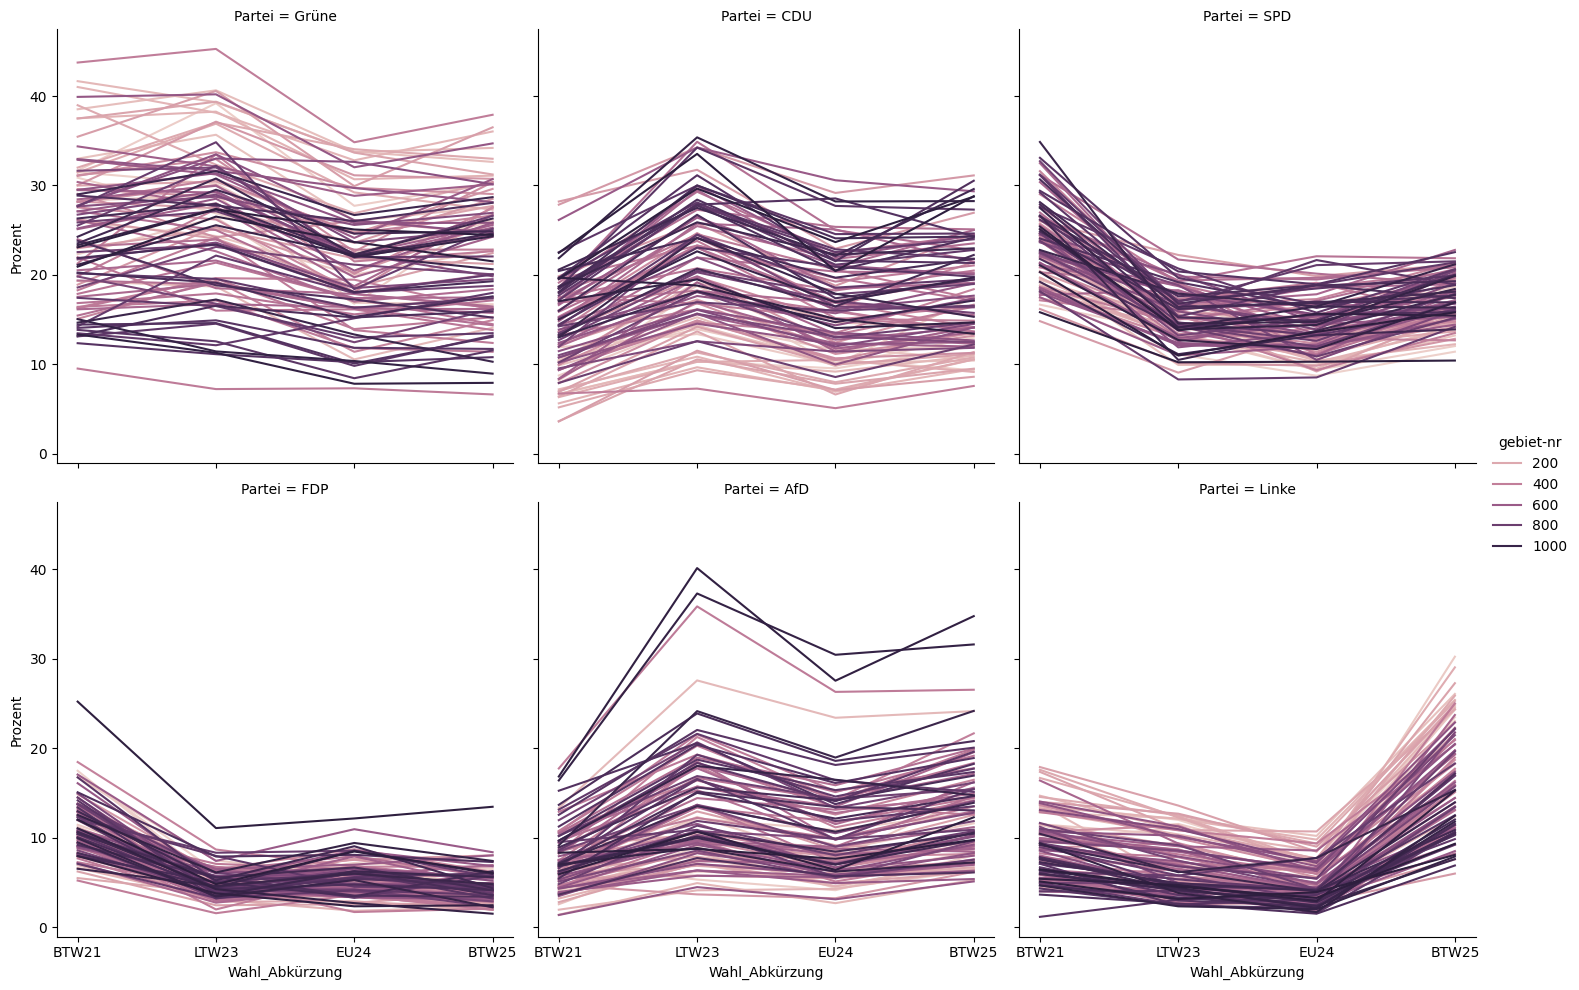

In [19]:
g = sns.relplot(data = dfl.query("~Stadtteil.isna()"), x = 'Wahl_Abkürzung', y = 'Prozent', hue = 'gebiet-nr', kind = 'line', col = 'Partei', col_wrap=3)
g.savefig("zeitverlauf_prozent.png")